### This project presents a comprehensive analysis of a restaurant tipping dataset, sourced from Kaggle. The primary objective is to uncover the key factors that influence the amount of a tip left by a customer. Through a process of exploratory data analysis (EDA), we will visualize data distributions, examine relationships between variables, and calculate statistical correlations. Finally, a linear regression model will be developed to predict tip amounts based on bill and customer characteristics, and its performance will be evaluated to assess its predictive accuracy.

Importing used libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



Loading data

In [36]:
tips = pd.read_csv("tip.csv")

Shape of the dataframe

In [37]:
tips.shape

(244, 7)

Datatypes of columns in the dataset

In [38]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


First five rows of the dataset

In [39]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Frequency of Tips in Different Amount Ranges

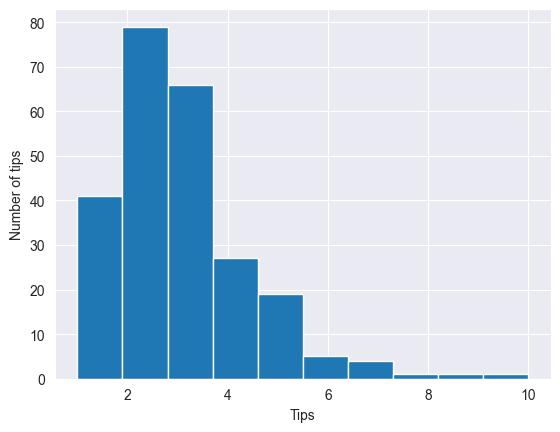

In [40]:
plt.hist(tips['tip'], bins=10)
plt.ylabel('Number of tips')
plt.xlabel('Tips')
plt.show()

Clearing the data

In [41]:
tips.isna().sum()
tips.isnull().sum()
tips.dropna()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Dropping the duplicates

In [42]:
tips.drop_duplicates()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Summary Statistics for Tips

In [43]:
tips['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

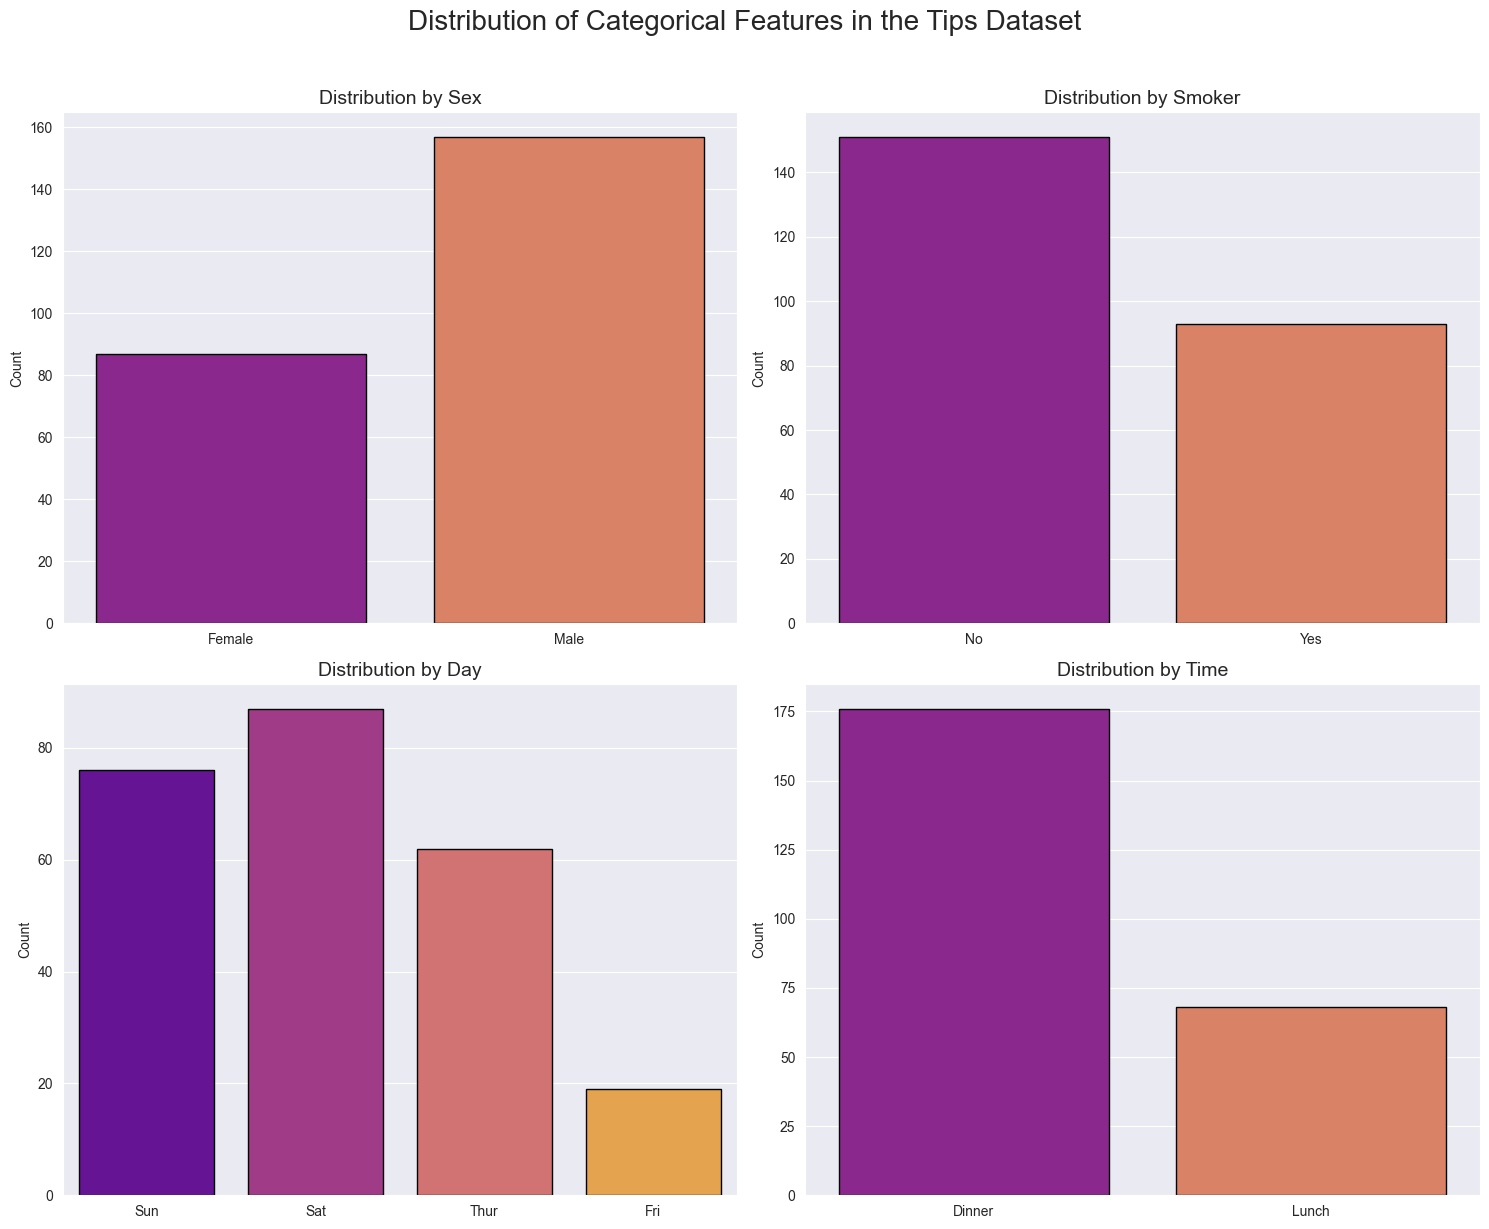

In [44]:
categorical_cols = tips.select_dtypes(include="object").columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i] #
    sns.countplot(data=tips, x=col, hue=col, edgecolor="black", palette="plasma", ax=ax, legend=False)
    ax.set_title(f'Distribution by {col.capitalize()}', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

fig.suptitle('Distribution of Categorical Features in the Tips Dataset', fontsize=20, y=1.02)

plt.tight_layout()
plt.show()

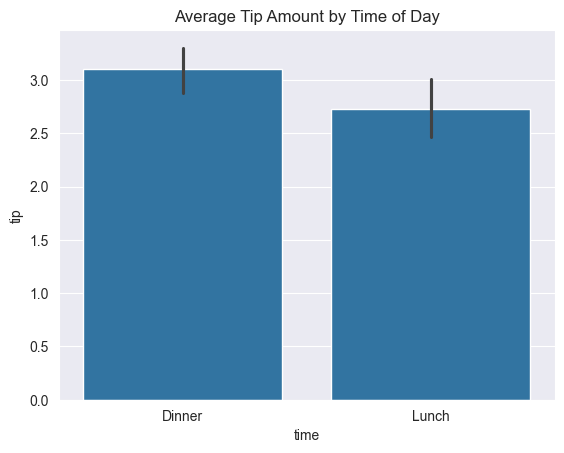

In [45]:
sns.barplot(data=tips,x="time",y="tip")
plt.title("Average Tip Amount by Time of Day")
plt.show()

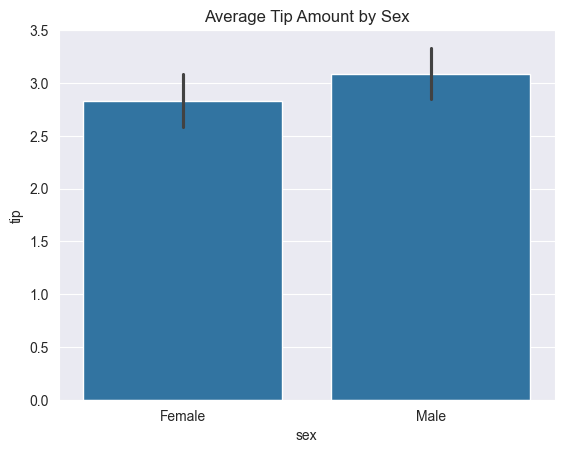

In [46]:
sns.barplot(data=tips,x="sex",y="tip")
plt.title("Average Tip Amount by Sex")
plt.show()

Creating a correlation matrix of out numeric columns

In [47]:
correlation = tips.select_dtypes(include=[np.number])
correlation_matrix = correlation.corr()
print(correlation_matrix)



            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


#### A positive correlation is observed between the total bill and the tip amount, implying that higher expenditures are associated with more generous tips.
#### Higher total bills are linked to larger tips.
#### There is a direct relationship between the total bill and the tip; an increase in one is met with a proportional increase in the other.

Encoding columns and training our model

In [48]:
categorical_cols = ['sex', 'smoker', 'day', 'time']

tips_encoded = pd.get_dummies(tips,
                              columns=categorical_cols,
                              drop_first=True)

X = tips_encoded.drop(columns="tip")
y = tips_encoded["tip"]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(train_X, train_y)

predictions = model.predict(test_X)




Visualization of the predicitions

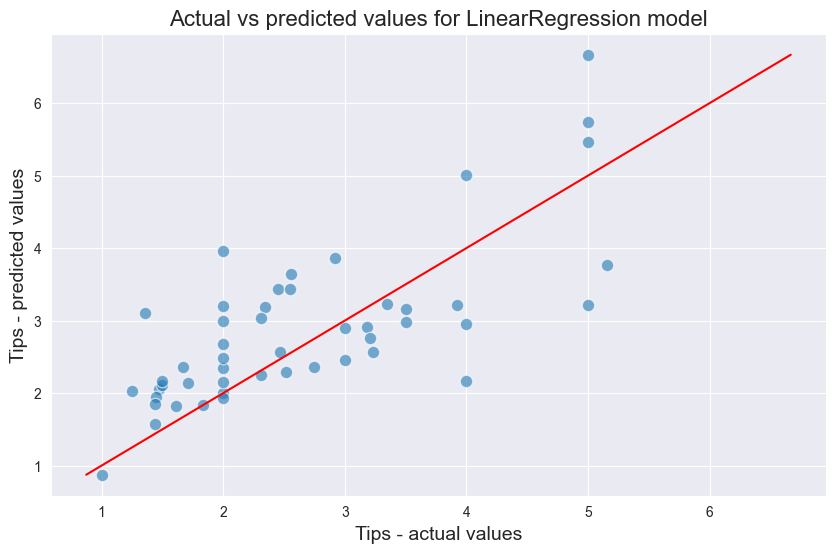

In [49]:
plt.figure(figsize=(10, 6))

plt.scatter(test_y, predictions, alpha=0.6, edgecolors='w', s=80)


p1 = max(max(predictions), max(test_y))
p2 = min(min(predictions), min(test_y))
plt.plot([p1, p2], [p1, p2], 'r-')

plt.xlabel("Tips - actual values", fontsize=14)
plt.ylabel("Tips - predicted values", fontsize=14)
plt.title("Actual vs predicted values for LinearRegression model", fontsize=16)
plt.grid(True)
plt.show()



In [50]:
print("Predicted values for 5 test values:")
print(predictions[:5])

print("\nReal values:")
print(test_y.head(5).values)

Predicted values for 5 test values:
[2.91436632 2.00292613 3.96425583 3.76380832 2.14836306]

Real values:
[3.18 2.   2.   5.16 2.  ]


In [51]:

mse = mean_squared_error(test_y, predictions)
r2 = r2_score(test_y, predictions)
model.score(test_X, test_y)

print("Model performance evaluation on the test set:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Coefficient of Determination (R-squared / R²): {r2:.4f}")

Model performance evaluation on the test set:
Mean Squared Error (MSE): 0.7034
Coefficient of Determination (R-squared / R²): 0.4373
